In [1]:
#1. 1~100사이의 좌표 50개를 생성
import random
random.seed(42)
x = [random.randint(1,100) for i in range(50)]
y = [random.randint(1,100) for i in range(50)]

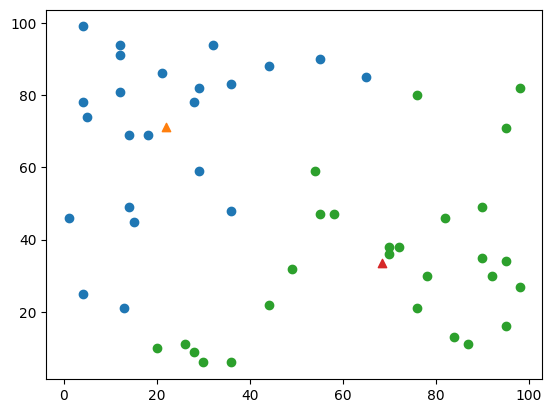

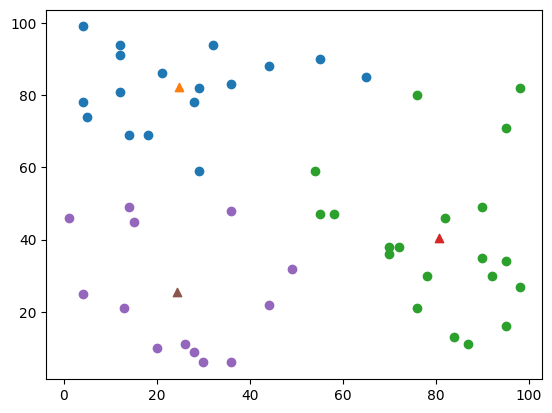

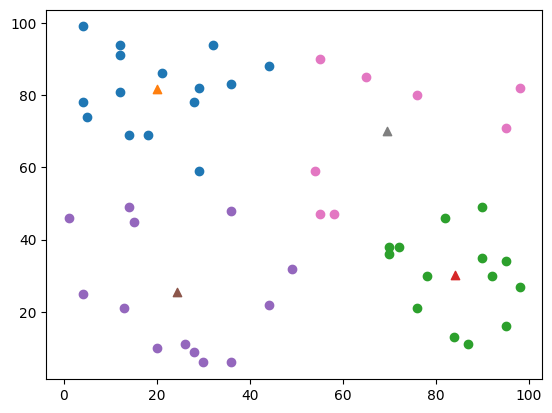

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

data = np.array([[x, y] for x, y in zip(x, y)])

inertia = []

# 클러스터 수를 2~4개로 바꿔가며 학습
for n in range(2, 5):
    km = KMeans(n_clusters=n, random_state=42)
    km.fit(data)

    inertia.append(km.inertia_)

    for m in range(n):
        plt.scatter(data[km.labels_ == m, 0], data[km.labels_ == m, 1])
        plt.scatter(km.cluster_centers_[m, 0], km.cluster_centers_[m, 1], marker='^')
    plt.show()

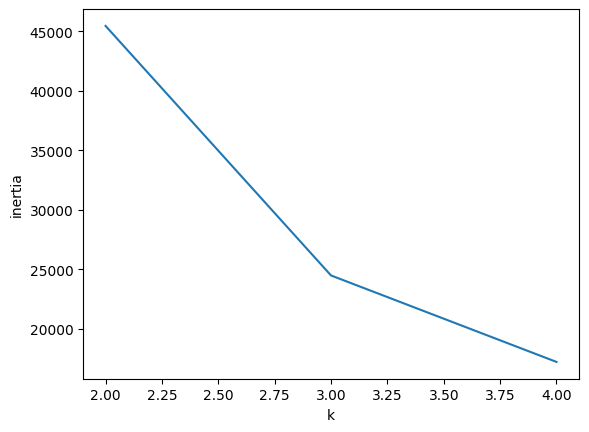

In [5]:
plt.plot(range(2, 5), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [8]:
# 최적 군집 수
best_k = 3

# 최적 k로 모델 다시 생성 & 학습
km_best = KMeans(n_clusters=best_k, random_state=42)
km_best.fit(data)

# 1) 센트로이드 출력
print("센트로이드:")
print(km_best.cluster_centers_)
print()

# 2) 50번 샘플과 각 센트로이드 거리 출력
sample_50 = data[49]   # 0-index이므로 50번째는 index 49
distances = np.linalg.norm(km_best.cluster_centers_ - sample_50, axis=1)

print("50번 샘플과 센트로이드 간 거리:")
print(distances)
print()

# 3) 레이블 출력
print("레이블:")
print(km_best.labels_)

센트로이드:
[[24.70588235 82.35294118]
 [80.75       40.5       ]
 [24.30769231 25.38461538]]

50번 샘플과 센트로이드 간 거리:
[62.45967557 70.50044326 12.12801539]

레이블:
[1 2 0 1 2 0 0 0 1 2 1 1 1 0 1 1 0 2 0 2 2 0 1 0 1 2 1 1 1 1 1 0 1 1 2 2 1
 0 1 0 0 0 2 0 1 2 0 0 2 2]
